In [1]:
import pymongo as pmg
import pandas as pd
import datetime as dt
import pymysql
import matplotlib.pyplot as plt
from matplotlib.lines import TICKLEFT, TICKRIGHT, Line2D
from matplotlib.patches import Rectangle
import matplotlib as mpl
import matplotlib.dates as mdate
from datetime import time
from KRData.HKData import HKFuture
import configparser
import talib as tb

In [2]:
df1=pd.read_pickle("pkl/hsi.pkl")
df1.head()

,datetime,code,open,high,low,close,MACD,MACD1,MACD2,MA30,MA60,CHG,STD60,STD1,DIFF,DEA
datetime,,,,,,,,,,,,,,,,
2014-01-02 09:15:00,2014-01-02 09:15:00,HSI1401,23414.0,23416.0,23370.0,23376.0,NaN,NaN,NaN,NaN,NaN,-38.0,NaN,NaN,NaN,NaN
2014-01-02 09:16:00,2014-01-02 09:16:00,HSI1401,23376.0,23394.0,23360.0,23394.0,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN
2014-01-02 09:17:00,2014-01-02 09:17:00,HSI1401,23395.0,23444.0,23391.0,23431.0,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN
2014-01-02 09:18:00,2014-01-02 09:18:00,HSI1401,23432.0,23435.0,23419.0,23423.0,NaN,NaN,NaN,NaN,NaN,-9.0,NaN,NaN,NaN,NaN
2014-01-02 09:19:00,2014-01-02 09:19:00,HSI1401,23426.0,23426.0,23390.0,23401.0,NaN,NaN,NaN,NaN,NaN,-25.0,NaN,NaN,NaN,NaN


In [22]:
def CalcMa60(date):
    time1=dt.time(9,15,0)
    time2=dt.time(16,30,0)
#     date='2019-01-03'
    f1=df1[str(date)]
    cont1=(f1.index.time>=time1)&(f1.index.time<=time2)
    res=[]
    rec={}
    state=0
    cont={}
    cnt=0
    no=0
    for i,row in f1[cont1].iterrows():
        cont['over']=row['close']>row['MA60'] and state in[0,2]
        cont['under']=row['close']<row['MA60'] and state in[0,1]
        cnt+=1
        if cont['over']:
            if state==2:
                rec['close']=row['close']
                rec['diff']=rec['open']-rec['close']
                rec['cnt']=cnt
                cnt=0
                rec['no']=no
                no+=1
                state=3
                #             print(rec)
                res.append(rec)
                rec={}
            state=1
            rec['begin']=i
            rec['open']=row['close']
            rec['state']=1
        elif cont['under'] :
            if state==1:
                rec['close']=row['close']
                rec['diff']=rec['open']-rec['close']
                rec['cnt']=cnt
                cnt=0
                rec['no']=no
                no+=1
                sate=4
    #             print(rec)
                res.append(rec)
                rec={}
            state=2
            rec['begin']=i
            rec['open']=row['close']
            rec['state']=2
    if state==1:
        rec['close']=row['close']
        rec['diff']=rec['open']-rec['close']
        rec['cnt']=cnt
        rec['no']=no
        res.append(rec)
    #     print(rec)
    elif state==2:
        rec['close']=row['close']
        rec['diff']=rec['open']-rec['close']
        rec['cnt']=cnt
        rec['no']=no
        res.append(rec)
    return res
#     print(rec)

In [23]:
dList=df1.datetime.dt.date.unique()
Result=[]
for dd in dList:
#     print(dd)
    res=CalcMa60(dd)
    for a in res:
        Result.append(a)
print("OK")

OK


In [27]:
Calc=['sum','count','mean','max','min','std']
R1=pd.DataFrame(Result)

R1['Date']=R1.begin.apply(lambda x:x.date())
R1.groupby(['state','no'])['diff'].agg(Calc)
R1[R1.state==2].groupby(['state','no'])['diff'].agg(Calc)
# R2.sort_values('sum')
# R1[(R1.state==1)&(R1.no==0)].sort_values('diff',ascending=False)
# R1['diff'].agg(Calc)

sum  count       mean     max    min        std
state no                                                    
2     0   -128.0    599  -0.213689   596.0 -305.0  97.212733
      1   2839.0    691   4.108538  1056.0 -122.0  74.060970
      2   1323.0    599   2.208681   634.0  -71.0  52.757299
      3   -470.0    691  -0.680174   384.0  -67.0  43.883117
      4    808.0    599   1.348915   998.0  -67.0  56.941178
      5  -1458.0    690  -2.113043   267.0  -73.0  33.579600
      6   -204.0    599  -0.340568   514.0 -127.0  39.902652
      7    686.0    686   1.000000   583.0  -56.0  43.282977
      8   -872.0    596  -1.463087   219.0  -81.0  28.514722
      9  -1560.0    678  -2.300885   501.0  -56.0  31.015520
      10   -73.0    590  -0.123729   327.0  -60.0  31.677009
      11   268.0    663   0.404223   538.0  -70.0  36.298479
      12  -572.0    581  -0.984509   404.0  -60.0  30.930313
      13  -129.0    651  -0.198157   254.0  -66.0  27.751907
      14  -999.0    571  -1.749562   364.0  -80.0  25.787838
      15  -169.0    632  -0.267405   418.0  -73.0  32.479856
      16  -198.0    540  -0.366667   285.0  -69.0  29.619335
      17  -412.0    606  -0.679868   525.0  -51.0  32.613182
      18 -1323.0    516  -2.563953   143.0  -48.0  19.962921
      19 -1015.0    575  -1.765217   260.0  -48.0  24.211010
      20  -747.0    483  -1.546584   294.0  -50.0  23.229225
      21  -266.0    526  -0.505703   239.0  -51.0  27.021102
      22   -41.0    445  -0.092135   440.0  -49.0  30.366204
      23 -1107.0    497  -2.227364   195.0  -59.0  20.629572
      24   499.0    406   1.229064   348.0  -62.0  32.332825
      25   -88.0    442  -0.199095   794.0  -60.0  43.599769
      26   461.0    364   1.266484   168.0  -34.0  25.541580
      27  1403.0    394   3.560914   713.0  -29.0  47.262330
      28    86.0    307   0.280130   145.0  -49.0  23.906538
      29   384.0    340   1.129412   249.0  -68.0  28.841767
...          ...    ...        ...     ...    ...        ...
      32   306.0    229   1.336245   461.0  -57.0  36.404231
      33   297.0    246   1.207317   205.0  -36.0  28.003238
      34    52.0    190   0.273684   245.0  -35.0  26.605065
      35   165.0    203   0.812808   166.0  -32.0  24.617559
      36   194.0    148   1.310811   181.0  -24.0  24.790510
      37  -138.0    161  -0.857143   140.0  -37.0  18.475950
      38    36.0    119   0.302521    97.0  -34.0  20.370948
      39   -13.0    116  -0.112069   141.0  -21.0  20.437719
      40   -31.0     92  -0.336957   106.0  -24.0  18.837231
      41  -130.0     88  -1.477273    89.0  -18.0  15.083657
      42   360.0     73   4.931507   133.0  -17.0  31.454256
      43   362.0     62   5.838710   308.0  -24.0  49.872360
      44   -60.0     54  -1.111111    69.0  -18.0  14.856123
      45   -37.0     48  -0.770833    67.0  -30.0  16.697865
      46    62.0     43   1.441860    75.0  -14.0  18.442062
      47  -176.0     38  -4.631579    16.0  -26.0   6.968737
      48   125.0     32   3.906250   194.0  -12.0  35.809856
      49    77.0     23   3.347826   106.0  -16.0  24.638493
      50   -77.0     18  -4.277778    10.0  -15.0   5.633989
      51   -15.0     11  -1.363636     5.0   -9.0   4.105429
      52   -74.0     14  -5.285714     3.0  -20.0   5.497252
      53    19.0      4   4.750000    36.0  -11.0  21.171915
      54    -2.0      8  -0.250000    25.0   -7.0  10.319884
      55    -7.0      2  -3.500000    -3.0   -4.0   0.707107
      56     0.0      4   0.000000     3.0   -4.0   3.559026
      57    -2.0      1  -2.000000    -2.0   -2.0        NaN
      58    46.0      2  23.000000    37.0    9.0  19.798990
      59    -5.0      1  -5.000000    -5.0   -5.0        NaN
      61    -1.0      1  -1.000000    -1.0   -1.0        NaN
      63     6.0      1   6.000000     6.0    6.0        NaN

[62 rows x 6 columns]

In [139]:
def TradeDay(Date):
#     Date='2014-01-03'
    F2=df1[str(Date)]

    #记录结果
    Dict_MACD={}
    Dict_MA60={}
    Dict_Trade={}
    Res={}
    Res['MACD']=[]
    Res['MA60']=[]
    Res['Trade']=[]
    #Begin Macd State
    Dict_MACD['StateB']=0
    #End MACD State
    Dict_MACD['StateE']=0
    Dict_MA60['State']=0
    #常用参数
    Para={}
    Para['Macd_Index']=0
    Para['Ma60_Index']=0
    Para['Macd_CNT1']=0
    Para['Macd_CNT2']=0
    Para['T1']=dt.time(9,15,0)
    Para['T2']=dt.time(16,30,0)
    Para['Index']=0
    Para['Trade_State']=0
    Ref=(F2.index.time>=Para['T1']) & (F2.index.time<=Para['T2'])
    #判断的条件
    Cont={}
    for i,row in F2[Ref].iterrows():
        #State MACD RED 1:>ma60,2:<ma6 |MACD Geen 3:>ma60,4:<ma60
        #持续MACD红区Red
        Cont['Macd_R']=row["MACD"]>0 and Dict_MACD['StateB'] in [1,2]
        #持续MACD绿区Green
        Cont['Macd_G']=row['MACD']<0 and Dict_MACD['StateB'] in [3,4]
        #to_MACD红区Red
        Cont['Macd_2R']=row['MACD']>0 and Dict_MACD['StateB'] in [0,3,4]
        #to_MACD_Green
        Cont['Macd_2G']=row['MACD']<0 and Dict_MACD['StateB'] in [0,1,2]

        #Over ma60
        Cont['Ma60_O']=row["close"]>row['MA60'] and Dict_MA60['State']==1
        #Under Ma60
        Cont['Ma60_U']=row['close']<row['MA60'] and Dict_MA60['State']==-1
        #TO Ma60 Over
        Cont['Ma60_2O']=row['close']>row['MA60'] and Dict_MA60['State']<=0
        #To Ma60 Under
        Cont['Ma60_2U']=row['close']<row['MA60'] and Dict_MA60['State']>=0

        #calc ma60
        if Cont['Ma60_2O'] or Cont['Ma60_2U']:
            #Ma60上下转换
            if Dict_MA60['State'] in[1,-1]:
                Dict_MA60['Close']=row['MA60']
                Dict_MA60['End']=i.time()
                Dict_MA60['Diff']=Dict_MA60['Close']-Dict_MA60['Open']
                Res['MA60'].append(Dict_MA60)
                Dict_MA60={}
            Dict_MA60['No']=Para['Ma60_Index']
            Dict_MA60['Date']=i.date()
            Dict_MA60['Begin']=i.time()
            Dict_MA60['Open']=row['close']
            Dict_MA60['High']=row['close']
            Dict_MA60['Low']=row['close']
            Dict_MA60['Count']=1
            Dict_MA60['Std1']=1 if row['STD1']>=1.5 else 0
            Dict_MA60['Std2']=1 if row['STD1']<=-1.5 else 0
            Dict_MA60['State']=1 if Cont['Ma60_2O'] else -1
            Para['Ma60_Index']+=1
            Para['Macd_CNT1']=0
            Para['Macd_CNT2']=0
        elif Cont['Ma60_O'] or Cont['Ma60_U']:
            Dict_MA60['Count']+=1
            if row['STD1']>=1.5:
                Dict_MA60['Std1']+=1
            elif row['STD1']<=-1.5:
                Dict_MA60['Std2']+=1
            if row['close']>Dict_MA60['High']:
                Dict_MA60['High']=row['close']
            elif row['close']<Dict_MA60['Low']:
                Dict_MA60['Low']=row['close']

        #MACD计算
        if Cont['Macd_2R'] or Cont['Macd_2G']:
            #StateB[1：macd>0 & close<ma60,2:macd>0&c>ma60,3:macd<0 & c>ma60,4:macd<0 & c<ma60]
            if Dict_MACD['StateB']>0:
                Dict_MACD['Close']=row['close']
                Dict_MACD['End']=i.time()
                Dict_MACD['Diff']=Dict_MACD['Close']-Dict_MACD['Open']
                if row["MACD"]>0 and row["close"]>row['MA60']:
                    Para['Macd_CNT2']+=1
                    Dict_MACD['No']=Para['Macd_CNT2']
                    Dict_MACD['StateE']=1
                elif row["MACD"]>0 and row["close"]<=row['MA60']:
                    Para['Macd_CNT2']+=-1
                    Dict_MACD['No']=Para['Macd_CNT2']
                    Dict_MACD['StateE']=2
                elif row["MACD"]<=0 and row["close"]>row['MA60']:
                    Para['Macd_CNT1']+=1
                    Dict_MACD['No']=Para['Macd_CNT1']
                    Dict_MACD['StateE']=3
                elif row["MACD"]<=0 and row["close"]<=row['MA60']:
                    Para['Macd_CNT1']+=-1
                    Dict_MACD['No']=Para['Macd_CNT1']
                    Dict_MACD['StateE']=4
                else:
                    Dict_MACD['State']=0

                Res['MACD'].append(Dict_MACD)
                Dict_MACD={}

            Dict_MACD['Begin']=i
            Dict_MACD['Date']=i.date()
            Dict_MACD['Ma60_No']=0 if Para['Ma60_Index']==0 else Dict_MA60['No']
            Dict_MACD['Open']=row['close']
            Dict_MACD['High']=row['close']
            Dict_MACD['Low']=row['close']
            Dict_MACD['Count']=1
            Dict_MACD['Std1']=1 if row['STD1']>=1.5 else 0
            Dict_MACD['Std2']=1 if row['STD1']<=-1.5 else 0

            if row["MACD"]>0 and row["close"]>row['MA60']:
                Dict_MACD['StateB']=1
            elif row["MACD"]>0 and row["close"]<=row['MA60']:
                Dict_MACD['StateB']=2
            elif row["MACD"]<=0 and row["close"]>row['MA60']:
                Dict_MACD['StateB']=3
            elif row["MACD"]<=0 and row["close"]<=row['MA60']:
                Dict_MACD['StateB']=4
            else:
                Dict_MACD['StateB']=0
        elif Cont['Macd_R'] or Cont['Macd_G']:
            Dict_MACD['Count']+=1
            if row['STD1']>=1.5:
                Dict_MACD['Std1']+=1
            elif row['STD1']<=-1.5:
                Dict_MACD['Std2']+=1

            if row['close']>Dict_MACD['High']:
                Dict_MACD['High']=row['close']
            elif row['close']<Dict_MACD['Low']:
                Dict_MACD['Low']=row['close']
        
        #交易判断
        if 'No'not in Dict_MA60.keys():
            Dict_MA60['No']=-1
        if 'Count'not in Dict_MA60.keys():
            Dict_MA60['Count']=0
            
#         if Dict_MA60['State'] in [1,-1] and Dict_MA60['Count']==1:
#             print(Dict_MA60)
            
#         Cont['Close']=Dict_MA60['State'] in [1,-1] and Dict_MA60['Count']==1 and Para['Trade_State']==1
        Cont['Close']=Dict_MA60['State'] in [1,-1] and Para['Trade_State']==1
#         Cont['Close']=(Cont['Ma60_2O'] or Cont['Ma60_2U'])  and Para['Trade_State']==1
#         print(Cont['Ma60_2O'] or Cont['Ma60_2U'])
        if not Cont['Close']:
            Dict_Trade['Count']=Dict_MA60['Count']
        if Cont['Close']:
            Dict_Trade['Close']=row['MA60']
            Dict_Trade['Index_C']=Para['Index']
            Dict_Trade['Diff']=row['close']-Dict_Trade['Open']-2 if Dict_Trade['Side']==1 \
            else Dict_Trade['Open']-row['close']-2
            Para['Trade_State']=0
            Res['Trade'].append(Dict_Trade)
            Dict_Trade={}
        
        #只交易第一个MA60段
        Cont['Buy']=Para['Index']==0 and Para['Trade_State']==0
        #交易所有MA60段
        #Cont['Buy']=Dict_MA60['Count']==1 and Para['Trade_State']==0 and Dict_MA60['State'] in [1,-1]

        if Cont['Buy']:
            Dict_Trade['Count']=1
            Dict_Trade['Open']=row['open']
            Dict_Trade['Ma60_No']=Dict_MA60['No']
            Dict_Trade['Date']=i.date()
            Dict_Trade['Side']=1 if Dict_MA60['State']==1 else 2
            Para['Trade_State']=1
#             print(Dict_Trade)
#         print(Dict_MA60)
#         Cont['Close']=(Cont['Ma60_2O'] or Cont['Ma60_2U']) and Dict_MA60['No']==1 and Para['Trade_State']==1

        Para['Index']+=1
    return Res

In [134]:
DateList=df1.datetime.dt.date.unique().tolist()
DateList=[str(i)for i in DateList]
def GetPreClose(Date):
# Date='2014-01-03'
    if Date in DateList:
        ii=DateList.index(Date)
        if ii>0:
            preDate=DateList[ii-1]
            preClose=df1[preDate]['close'][-1]
            return preClose
        else:
            return df1[Date]['open'][0]
    else:
        return -2

In [140]:
Date='2014/1/3'
Res=TradeDay(Date)
# print(Res['Trade'])
pd.DataFrame(Res['Trade'])

,Close,Count,Date,Diff,Index_C,Ma60_No,Open,Side
0,23271.986379,1,2014-01-03,67.0,1,0,23171.0,2


In [138]:
Date='2014-01-02'
print(GetPreClose(Date))
# df1[Date].head()

23414.0


In [141]:
t1=dt.datetime.now()
dList=df1.datetime.dt.date.unique()
Result=[]
for dd in dList:
#     print(dd)
    res=TradeDay(dd)
    preC=GetPreClose(str(dd))
#     print(dd,preC)
    for a in res['Trade']:
        a['preClose']=preC
        Result.append(a)
t2=dt.datetime.now()
print(t2-t1)

0:01:21.548328


In [205]:
Calc=['sum','count','mean','max','min','std']
R1=pd.DataFrame(Result)
print(R1.Diff.agg(['sum','mean']))
# R1[['Ma60_No','Side','Diff']].groupby(['Ma60_No','Side']).agg(Calc)
R1.head()

sum     11626.000000
mean        9.005422
Name: Diff, dtype: float64


,Close,Count,Date,Diff,Index_C,Ma60_No,Open,Side,preClose
0,23390.216667,0,2014-01-02,113.0,59,-1,23414.0,2,23414.0
1,23271.986379,1,2014-01-03,67.0,1,0,23171.0,2,23244.0
2,22849.718052,1,2014-01-06,65.0,1,0,22793.0,2,22844.0
3,22681.267681,1,2014-01-07,-15.0,1,0,22612.0,2,22670.0
4,22717.080301,1,2014-01-08,27.0,1,0,22734.0,1,22758.0


In [209]:
print('Open Corr 10')
R1['Open_Diff']=R1.Open-R1.preClose
R1[R1.Open_Diff>0].groupby(round(R1.Open_Diff/10,0))['Diff'].agg(Calc)
R1[R1.Open_Diff<=0].groupby(round(R1.Open_Diff/10,0))['Diff'].agg(Calc)

Open Corr 10


,sum,count,mean,max,min,std
Open_Diff,,,,,,
-120.0,-173.0,1,-173.000000,-173.0,-173.0,NaN
-75.0,25.0,1,25.000000,25.0,25.0,NaN
-63.0,-97.0,1,-97.000000,-97.0,-97.0,NaN
-59.0,52.0,1,52.000000,52.0,52.0,NaN
-58.0,33.0,2,16.500000,30.0,3.0,19.091883
-54.0,-63.0,1,-63.000000,-63.0,-63.0,NaN
-53.0,-14.0,1,-14.000000,-14.0,-14.0,NaN
-51.0,-68.0,1,-68.000000,-68.0,-68.0,NaN
-48.0,-183.0,1,-183.000000,-183.0,-183.0,NaN


In [201]:
R2.groupby(round(R2.Open_Diff/10,0))['Diff'].agg(Calc)

,sum,count,mean,max,min,std
Open_Diff,,,,,,
-25.0,-20.0,3,-6.666667,49.0,-51.0,50.954228
-24.0,258.0,6,43.000000,121.0,-16.0,46.963816
-23.0,-61.0,2,-30.500000,-15.0,-46.0,21.920310
-22.0,-22.0,2,-11.000000,-4.0,-18.0,9.899495
-21.0,100.0,3,33.333333,108.0,-22.0,67.121780
-20.0,113.0,10,11.300000,55.0,-40.0,33.483163
-19.0,27.0,4,6.750000,20.0,-12.0,13.500000
-18.0,89.0,6,14.833333,70.0,-72.0,56.229589
-17.0,-46.0,6,-7.666667,40.0,-41.0,31.181191


In [208]:
R1.head()

,Close,Count,Date,Diff,Index_C,Ma60_No,Open,Side,preClose
0,23390.216667,0,2014-01-02,113.0,59,-1,23414.0,2,23414.0
1,23271.986379,1,2014-01-03,67.0,1,0,23171.0,2,23244.0
2,22849.718052,1,2014-01-06,65.0,1,0,22793.0,2,22844.0
3,22681.267681,1,2014-01-07,-15.0,1,0,22612.0,2,22670.0
4,22717.080301,1,2014-01-08,27.0,1,0,22734.0,1,22758.0


In [210]:
# R1['Diff'].agg(Calc)
# R1.head()
cont=R1.Open_Diff.between(-250,190)
R2=R1[cont].copy()
R2['Date']=pd.to_datetime(R1.Date)
print(R2.Diff.agg(['sum','mean','max','min']))
R2.set_index('Date').resample('Y')['Diff'].agg(Calc)


sum     13001.000000
mean       10.852254
max       311.000000
min      -140.000000
Name: Diff, dtype: float64


,sum,count,mean,max,min,std
Date,,,,,,
2014-12-31,2808.0,236,11.898305,164.0,-117.0,39.888438
2015-12-31,2678.0,231,11.593074,311.0,-140.0,51.185075
2016-12-31,2509.0,224,11.200893,128.0,-78.0,35.398181
2017-12-31,1541.0,244,6.315574,80.0,-59.0,26.551038
2018-12-31,3451.0,208,16.591346,222.0,-100.0,48.182436
2019-12-31,14.0,55,0.254545,136.0,-90.0,45.788652


In [ ]:
cont=R1.Diff.between

In [ ]:
cont=R1.Diff.isin

In [125]:
cont=R1.Ma60_No==1
print(R1[cont].Diff.sum())
R1[cont].set_index('Date').resample('Y')['Diff'].agg(Calc)

7094.374420082142


,sum,count,mean,max,min,std
Date,,,,,,
2014-12-31,1319.049840,247,5.340283,267.590538,-31.786624,33.257946
2015-12-31,1260.989739,247,5.105222,443.559456,-55.107175,42.562162
2016-12-31,1423.202383,245,5.808989,271.237986,-41.340511,31.675727
2017-12-31,1042.130567,246,4.236303,257.531149,-35.715652,28.697551
2018-12-31,1633.138328,246,6.638774,412.647036,-73.224712,46.270632
2019-12-31,415.863563,60,6.931059,184.439204,-19.507951,27.779335


In [27]:
cont=R1.Ma60_No<12
print(R1[cont].Diff.sum())
R2=R1[cont].set_index('Date').resample('B')['Diff'].agg(Calc)
R2.sort_values('sum',ascending=False)

11626.0


,sum,count,mean,max,min,std
Date,,,,,,
2015-08-25,311.0,1,311.0,311.0,311.0,NaN
2015-04-20,276.0,1,276.0,276.0,276.0,NaN
2018-10-08,222.0,1,222.0,222.0,222.0,NaN
2018-03-26,206.0,1,206.0,206.0,206.0,NaN
2015-07-09,191.0,1,191.0,191.0,191.0,NaN
2014-03-10,164.0,1,164.0,164.0,164.0,NaN
2015-06-03,149.0,1,149.0,149.0,149.0,NaN
2014-12-01,147.0,1,147.0,147.0,147.0,NaN
2015-04-10,139.0,1,139.0,139.0,139.0,NaN


In [95]:
Calc=['sum','count','mean','max','min','std']
R1=pd.DataFrame(Result)
R1['Diff'].agg(Calc)

sum      4899.859643
count    1031.000000
mean        4.752531
max       341.705025
min       -72.344094
std        45.975819
Name: Diff, dtype: float64

In [46]:
R1.sort_values('Diff',ascending=False)
R1.sort_values('Diff',ascending=True)
R1.head()

,Close,Date,Diff,Index_C,Open,Side
0,23236.056955,2014-01-02,62.943045,148,23299.0,2
1,22898.813046,2014-01-03,238.186954,165,23137.0,2
2,22629.540021,2014-01-06,143.459979,94,22773.0,2
3,22665.502411,2014-01-07,-19.502411,17,22646.0,2
4,22862.089431,2014-01-08,133.089431,107,22729.0,1


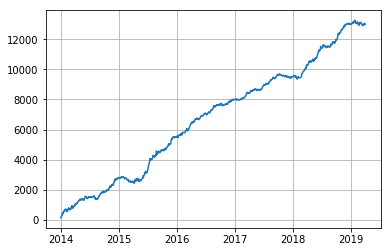

In [198]:
plt.plot(R2.Date,R2.Diff.cumsum())
plt.grid(True)
plt.show()

OK


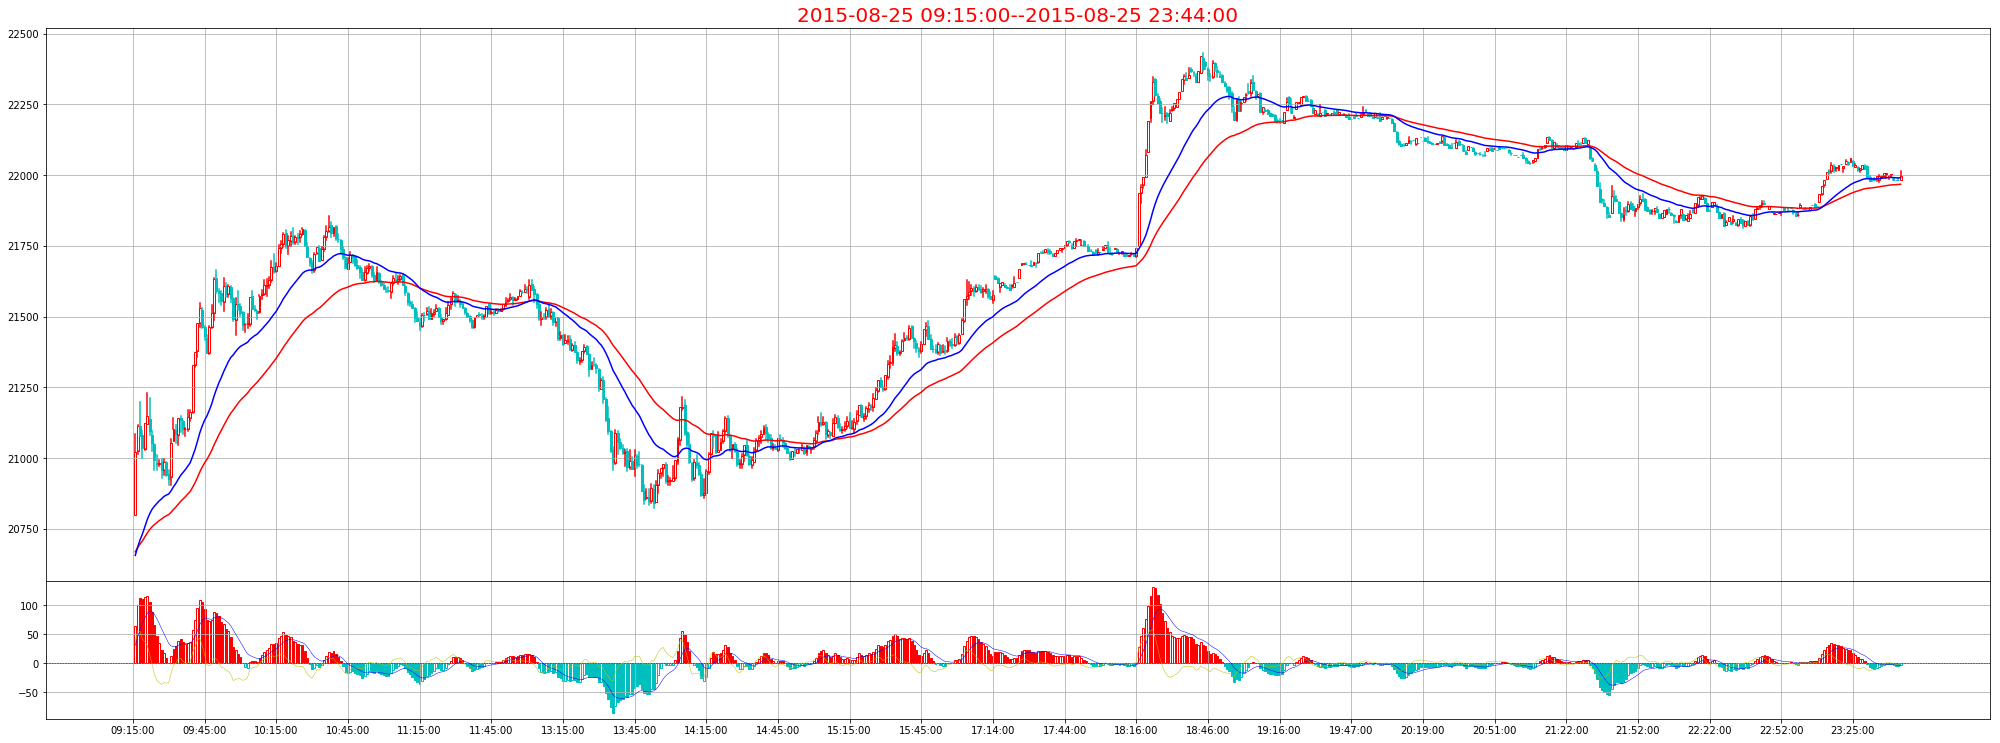

In [28]:
from kline import Kline as KK
K1=KK()
date='2015-08-25'
dd=df1[date]
K1.DrawKline(dd)

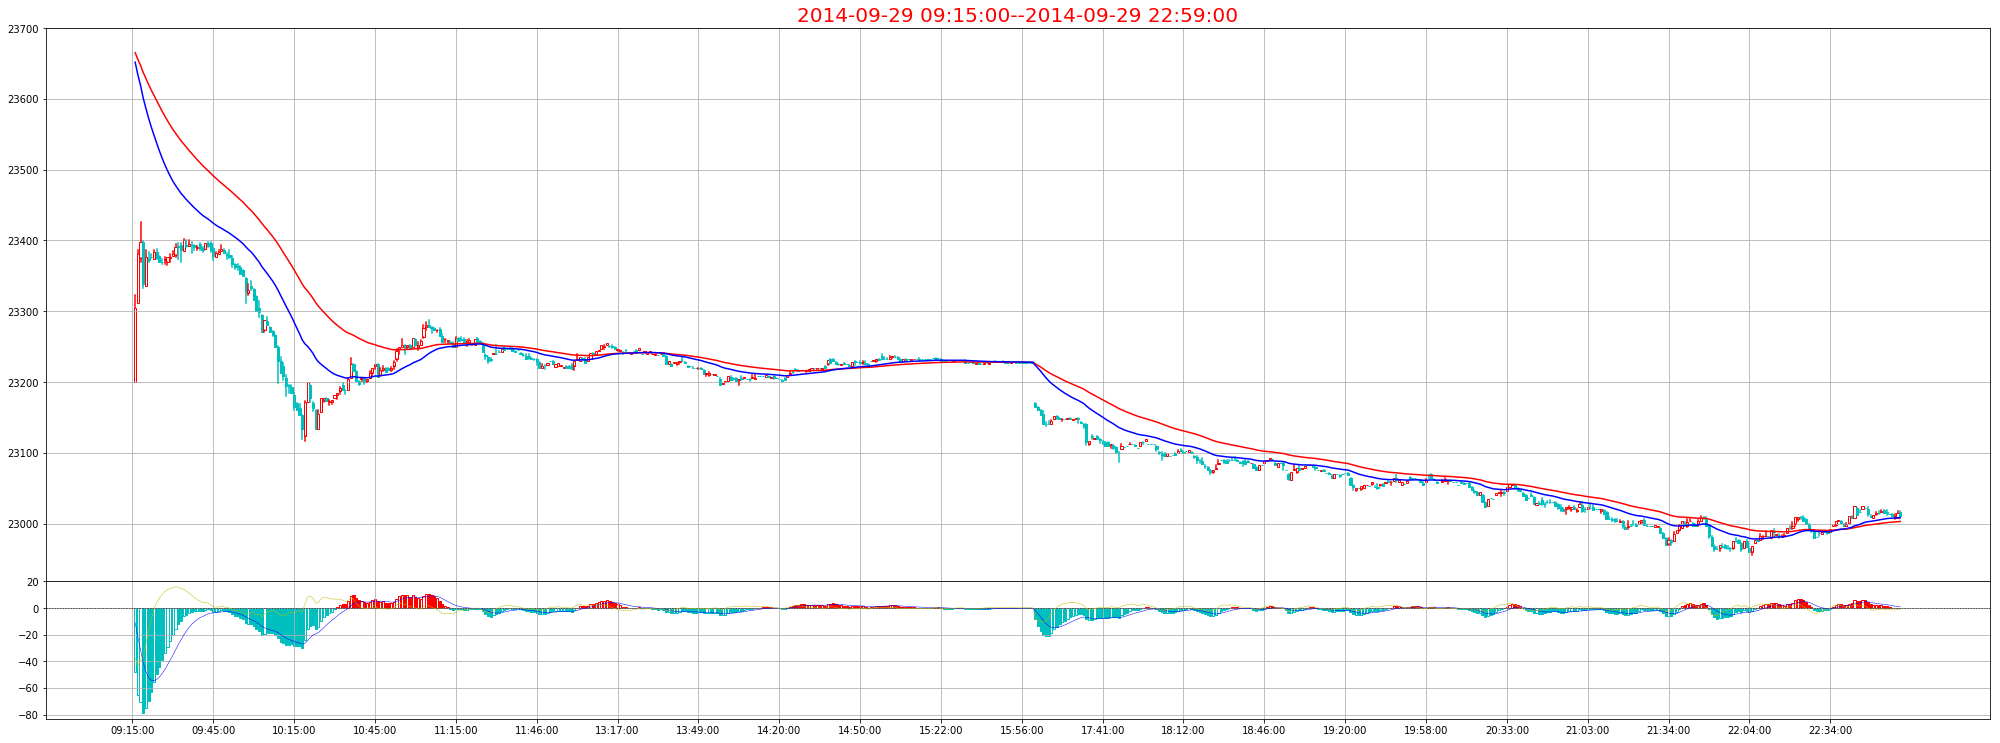

In [29]:
date='2014/9/29'
dd=df1[date]
K1.DrawKline(dd)

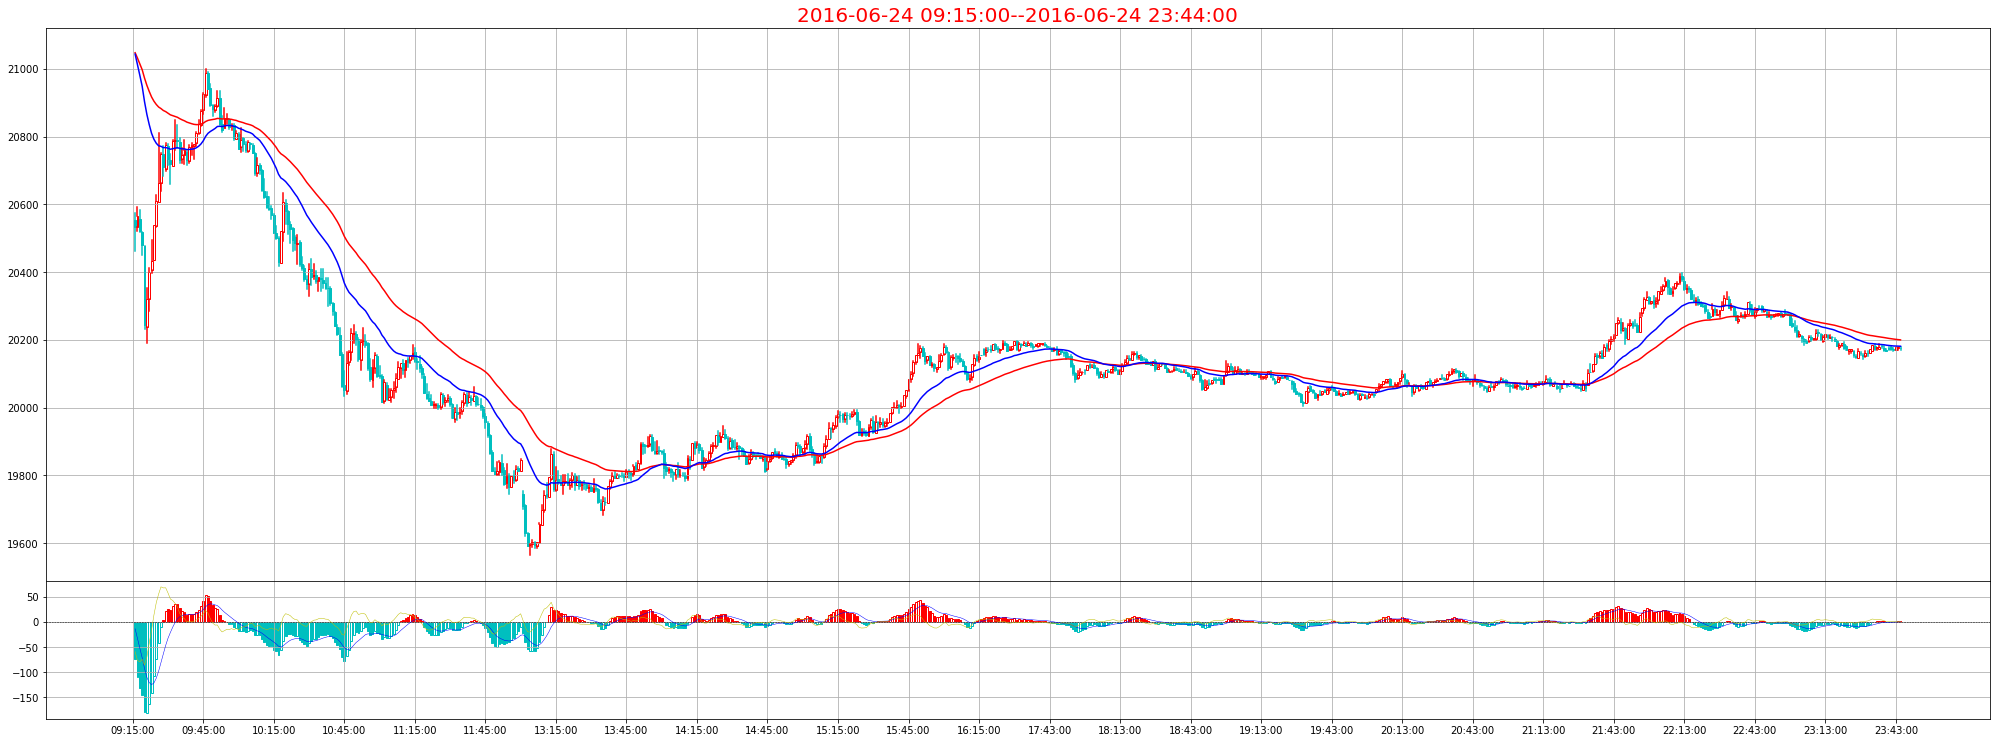

In [70]:
date='2016-06-24'
dd=df1[date]
K1.DrawKline(dd)

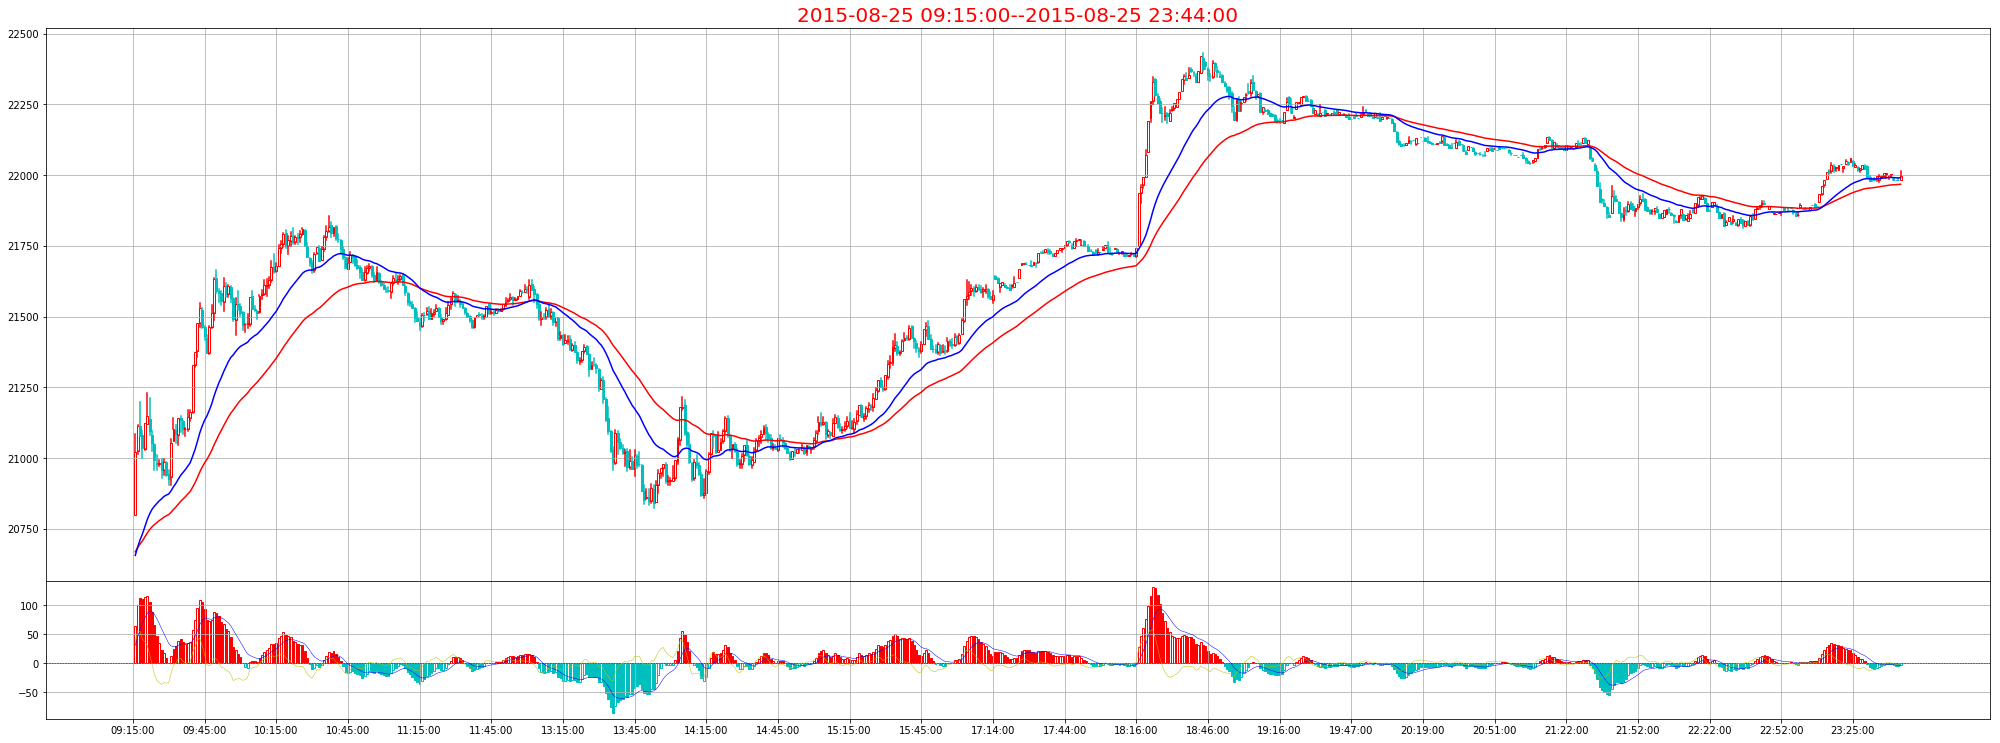

In [18]:
date='2015/8/25'
dd=df1[date]
K1.DrawKline(dd)